<a href="https://colab.research.google.com/github/ameyas1/Blackpink_Face_Recognition/blob/master/image_to_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from urllib.request import urlopen
import os
import bz2
import cv2

import matplotlib.patches as patches
import zipfile
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import shutil
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

from align import AlignDlib

%matplotlib inline

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:



def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()

    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024)
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)


dst_dir = 'model1'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)

In [0]:


def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
#     b,g,r = cv2.split(img)     
#     img = cv2.merge([r,g,b])
#     return img
    return img[...,::-1]

# Initialize the OpenFace face alignment utility
alignment = AlignDlib('model1/landmarks.dat')

In [0]:

zip_ref = zipfile.ZipFile('drive/My Drive/test_v4.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:

zip_ref = zipfile.ZipFile('drive/My Drive/train_v4.zip', 'r')
zip_ref.extractall()
zip_ref.close()

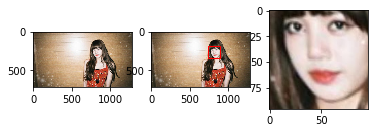

In [7]:
jc_orig = load_image('blackpink lisa/14.maxresdefault.jpg')

# Detect face and return bounding box
bb = alignment.getLargestFaceBoundingBox(jc_orig)

# Transform image using specified face landmark indices and crop image to 96x96
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

# Show original image
plt.subplot(131)
plt.imshow(jc_orig)

# Show original image with bounding box
plt.subplot(132)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
plt.subplot(133)
plt.imshow(jc_aligned);

# img = cv2.cvtColor(jc_aligned, cv2.COLOR_BGR2RGB)
# im_pil = Image.fromarray(jc_aligned)

# im_pil.save('rosieroses123.jpg','JPEG')

In [0]:


def add_multiple_image(image_path,name,target_dir):
#   img = cv2.imread(image_path)
#   img = cv2.resize(img, (96, 96))
#   b,g,r = cv2.split(img)     
#   img = cv2.merge([r,g,b])

  
  try:
    
    img=load_image(image_path)
    bb = alignment.getLargestFaceBoundingBox(img)
    face = alignment.align(224, img, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    
  
  
    
    plt.subplot(121)
    plt.imshow(img)
    plt.title(name)
    plt.subplot(122)
    plt.imshow(face)
    plt.title(name+'(face)')
    
    
    im_pil = Image.fromarray(face)

    im_pil.save(target_dir)
      
  except TypeError:
    print(image_path)
    os.remove(image_path)

In [0]:
jennie_dir='blackpink jennie/'
jisoo_dir='blackpink jisoo/'
lisa_dir='blackpink lisa/'
rose_dir='blackpink rose/'
target_dir='train/'

In [10]:
len(os.listdir(rose_dir))

612

In [0]:
!mkdir train
!mkdir train/rose
!mkdir train/jennie
!mkdir train/lisa
!mkdir train/jisoo

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


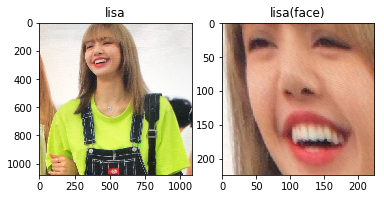

In [12]:
for i in os.listdir(lisa_dir):
  add_multiple_image(lisa_dir+i,'lisa',os.path.join('train/lisa/',str(i)))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


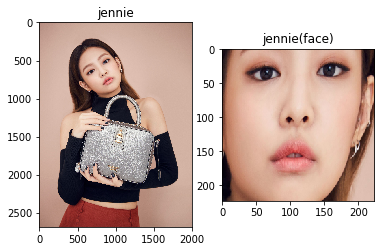

In [13]:
for i in os.listdir(jennie_dir):
  add_multiple_image(jennie_dir+i,'jennie',os.path.join('train/jennie/',str(i)))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


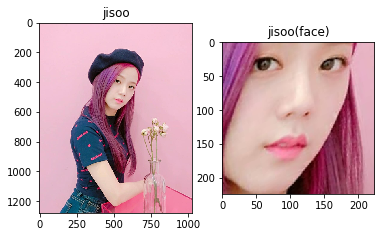

In [14]:
for i in os.listdir(jisoo_dir):
  add_multiple_image(jisoo_dir+i,'jisoo',os.path.join('train/jisoo/',str(i)))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


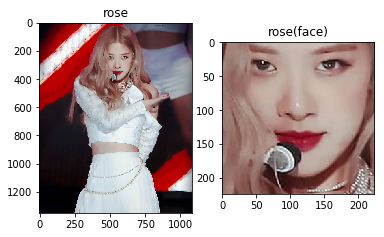

In [15]:
for i in os.listdir(rose_dir):
  add_multiple_image(rose_dir+i,'rose',os.path.join('train/rose/',str(i)))

In [0]:
jennie_dir='test_jennie/'
jisoo_dir='test_jisoo/'
lisa_dir='test_lisa/'
rose_dir='test_rose/'
target_dir='test/'

In [0]:
!mkdir test
!mkdir test/rose
!mkdir test/jisoo
!mkdir test/lisa
!mkdir test/jennie

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


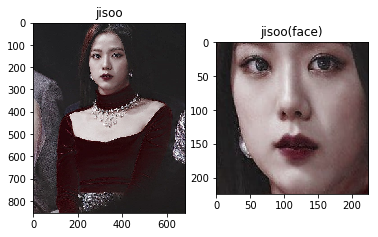

In [18]:
for i in os.listdir(jisoo_dir):
  add_multiple_image(jisoo_dir+i,'jisoo',os.path.join('test/jisoo/',str(i)))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


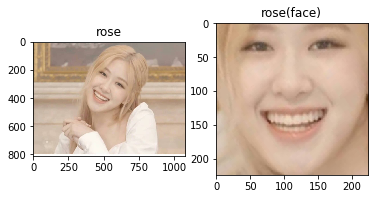

In [19]:
for i in os.listdir(rose_dir):
  add_multiple_image(rose_dir+i,'rose',os.path.join('test/rose/',str(i)))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


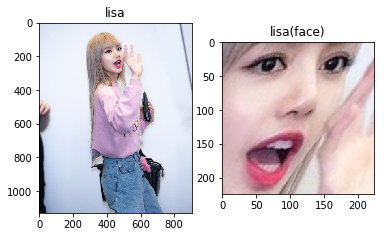

In [20]:
for i in os.listdir(lisa_dir):
  add_multiple_image(lisa_dir+i,'lisa',os.path.join('test/lisa/',str(i)))

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


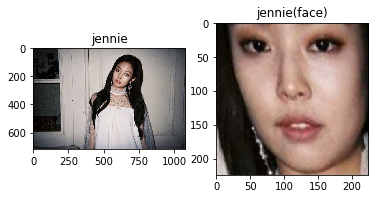

In [21]:
for i in os.listdir(jennie_dir):
  add_multiple_image(jennie_dir+i,'jennie',os.path.join('test/jennie/',str(i)))

In [22]:
shutil.make_archive('train_vgg', 'zip', 'train')

'/content/train_vgg.zip'

In [23]:
shutil.make_archive('test_vgg', 'zip', 'test')

'/content/test_vgg.zip'

In [0]:

zip_ref = zipfile.ZipFile('drive/My Drive/test_vgg.zip', 'r')
zip_ref.extractall('test_vgg')
zip_ref.close()

In [0]:

zip_ref = zipfile.ZipFile('drive/My Drive/train_vgg.zip', 'r')
zip_ref.extractall('train_vgg')
zip_ref.close()

In [0]:
def preprocess_image(image_path,target_dir,show=False):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    
#     img1 = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    img1=array_to_img(img)
    
    if show:
      
      img1.show()  
    img1.save(target_dir)

In [0]:
!mkdir train_p
!mkdir train_p/rose
!mkdir train_p/jennie
!mkdir train_p/lisa
!mkdir train_p/jisoo

In [0]:
jennie_dir='train_vgg/jennie/'
jisoo_dir='train_vgg/jisoo/'
lisa_dir='train_vgg/lisa/'
rose_dir='train_vgg/rose/'

In [0]:
for i in os.listdir(lisa_dir):
  preprocess_image(lisa_dir+i,os.path.join('train_p/lisa/',str(i)),True)

In [0]:
for i in os.listdir(jennie_dir):
  preprocess_image(jennie_dir+i,os.path.join('train_p/jennie/',str(i)),True)

In [0]:
for i in os.listdir(jisoo_dir):
  preprocess_image(jisoo_dir+i,os.path.join('train_p/jisoo/',str(i)),True)

In [0]:
for i in os.listdir(rose_dir):
  preprocess_image(rose_dir+i,os.path.join('train_p/rose/',str(i)),True)

In [0]:
jennie_dir='test_vgg/jennie/'
jisoo_dir='test_vgg/jisoo/'
lisa_dir='test_vgg/lisa/'
rose_dir='test_vgg/rose/'

In [0]:
!mkdir test_p
!mkdir test_p/rose
!mkdir test_p/jennie
!mkdir test_p/lisa
!mkdir test_p/jisoo

In [0]:
for i in os.listdir(lisa_dir):
  preprocess_image(lisa_dir+i,os.path.join('test_p/lisa/',str(i)),True)

In [0]:
for i in os.listdir(rose_dir):
  preprocess_image(rose_dir+i,os.path.join('test_p/rose/',str(i)),True)

In [0]:
for i in os.listdir(jisoo_dir):
  preprocess_image(jisoo_dir+i,os.path.join('test_p/jisoo/',str(i)),True)

In [0]:
for i in os.listdir(jennie_dir):
  preprocess_image(jennie_dir+i,os.path.join('test_p/jennie/',str(i)),True)


In [39]:
shutil.make_archive('test_p_vgg', 'zip', 'test_p')

'/content/test_p_vgg.zip'

In [40]:
shutil.make_archive('train_p_vgg', 'zip', 'train_p')

'/content/train_p_vgg.zip'